# **part a)**


### 1) Neural Network using Numpy from scratch

In [142]:
!python --version

Python 3.7.10


In [143]:
pip install torchvision

In [144]:
!pip list | grep tensor

tensorboard                   2.4.1             
tensorboard-plugin-wit        1.8.0             
tensorflow                    2.4.1             
tensorflow-datasets           4.0.1             
tensorflow-estimator          2.4.0             
tensorflow-gcs-config         2.4.0             
tensorflow-hub                0.11.0            
tensorflow-metadata           0.28.0            
tensorflow-probability        0.12.1            


In [145]:
!pip list | grep torch

pytorch-lightning             1.3.0.dev0        
torch                         1.8.0+cu101       
torchmetrics                  0.2.0             
torchsummary                  1.5.1             
torchtext                     0.9.0             
torchvision                   0.9.0+cu101       


In [146]:
pip install git+git://github.com/Theano/Theano.git

  Cloning git://github.com/Theano/Theano.git to /tmp/pip-req-build-fnprwxug
  Running command git clone -q git://github.com/Theano/Theano.git /tmp/pip-req-build-fnprwxug
  Created wheel for Theano: filename=Theano-1.0.5+2.g8e9611715-cp37-none-any.whl size=2668286 sha256=d6f1630d36b2f32435abbc721b4fc15bcf113259aee122ec5a103e18d773870d
  Stored in directory: /tmp/pip-ephem-wheel-cache-yosbqjsw/wheels/ae/32/7c/62beb8371953eb20c271b3bac7d0e56e1a2020d46994346b52
Successfully built Theano


In [147]:
import sys, os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
DIR = '/content/drive/My Drive/Deep Learning/Assignment 3'
if os.getcwd() != DIR:
  os.chdir(DIR)

In [149]:
import h5py
h5py.File('train_catvnoncat.h5', "r")

<HDF5 file "train_catvnoncat.h5" (mode r)>

In [150]:
def dataset_input():
    train_dtst = h5py.File('train_catvnoncat.h5', "r")
    train_x = np.array(train_dtst["train_set_x"][:]) 
    train_y = np.array(train_dtst["train_set_y"][:])
    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_x = np.array(test_dataset["test_set_x"][:]) 
    test_y = np.array(test_dataset["test_set_y"][:])
    classes = np.array(test_dataset["list_classes"][:]) 
    
    train_y = train_y.reshape((1, train_y.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))
    return train_x, train_y, test_x, test_y, classes

In [151]:
train_x, train_y, test_x, test_y, classes = dataset_input()
print ("Train X shape: " + str(train_x.shape))
print ("Train Y shape: " + str(train_y.shape))
print ("Test X shape: " + str(test_x.shape))
print ("Test Y shape: " + str(test_y.shape))

Train X shape: (209, 64, 64, 3)
Train Y shape: (1, 209)
Test X shape: (50, 64, 64, 3)
Test Y shape: (1, 50)


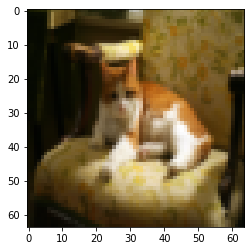

In [152]:
plt.imshow(train_x[7])

In [153]:
# Clubbing the 64*64*3 values of image of height 64 pixel width 64 pixel and channels of red,green,blue to 12288 values of single dimension
train_x = train_x.reshape(train_x.shape[0],-1).T
test_x = test_x.reshape(test_x.shape[0], -1).T
print ("Train X shape: " + str(train_x.shape))
print ("Train Y shape: " + str(train_y.shape))
print ("Test X shape: " + str(test_x.shape))
print ("Test Y shape: " + str(test_y.shape))

Train X shape: (12288, 209)
Train Y shape: (1, 209)
Test X shape: (12288, 50)
Test Y shape: (1, 50)


In [154]:
train_x=train_x.transpose()
train_y=train_y.transpose()
test_x=test_x.transpose()
test_y=test_y.transpose()
print ("Train X shape: " + str(train_x.shape))
print ("Train Y shape: " + str(train_y.shape))
print ("Test X shape: " + str(test_x.shape))
print ("Test Y shape: " + str(test_y.shape))

Train X shape: (209, 12288)
Train Y shape: (209, 1)
Test X shape: (50, 12288)
Test Y shape: (50, 1)


In [155]:
test_y_df=pd.DataFrame(test_y,columns=['cat'])
train_y_df=pd.DataFrame(train_y,columns=['cat'])

In [156]:
def coding(row):
    if row['cat'] == 1:
        val = 0
    else:
        val = 1
    return val

In [157]:
test_y_df['not_cat'] = test_y_df.apply(coding, axis=1)
train_y_df['not_cat'] = train_y_df.apply(coding,axis=1)

In [158]:
test_y=test_y_df.to_numpy()
train_y=train_y_df.to_numpy()

In [159]:
x=[]
for i in range(len(train_x)):
  x.append(train_x[0].reshape((1,12288)))

In [160]:
#General standardization of image input by dividing each input pixel value by maximum pixel value 255
train_x = train_x/255.
test_x = test_x/255.

In [161]:
#Sigmoid function for hidden layers
def sigmoid(z):
    return 1/(1+np.exp(-z))



In [162]:
#Softmax function for output layer
from numpy import exp
def softmax(z):
	e = exp(z)
	return e / e.sum()
 
def generate_wt(x, y): 
    l =[] 
    for i in range(x * y): 
        l.append(np.random.randn()) 
    return(np.array(l).reshape(x, y))

def f_forward(x, w1, w2): 
    # hidden 
    z1 = x.dot(w1)# input from layer 1  
    a1 = sigmoid(z1)# out put of layer 2  
      
    # Output layer 
    z2 = a1.dot(w2)# input of out layer 
    a2 = sigmoid(z2)# output of out layer 
    return(a2)
def loss(out, Y): 
    s =(np.square(out-Y)) 
    s = np.sum(s)/len(y) 
    return(s) 
def back_prop(x, y, w1, w2, alpha): 
      
    # hiden layer 
    z1 = x.dot(w1)# input from layer 1  
    a1 = sigmoid(z1)# output of layer 2  
      
    # Output layer 
    z2 = a1.dot(w2)# input of out layer 
    a2 = sigmoid(z2)# output of out layer 
    # error in output layer 
    d2 =(a2-y) 
    d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),  
                                   (np.multiply(a1, 1-a1))) 
    # Gradient for w1 and w2 
    w1_adj = x.transpose().dot(d1) 
    w2_adj = a1.transpose().dot(d2) 
      
    # Updating parameters 
    w1 = w1-(alpha*(w1_adj)) 
    w2 = w2-(alpha*(w2_adj)) 
      
    return(w1, w2) 
def train(x, Y, w1, w2, alpha = 0.01, epoch = 10): 
    acc =[] 
    losss =[] 
    for j in range(epoch): 
        l =[] 
        for i in range(len(x)): 
            out = f_forward(x[i], w1, w2) 
            l.append((loss(out, Y[i]))) 
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha) 
        print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)    
        acc.append((1-(sum(l)/len(x)))*100) 
        losss.append(sum(l)/len(x)) 
    return(acc, losss, w1, w2)      
def predict(x, w1, w2): 
    Out = f_forward(x, w1, w2) 
    maxm = 0
    k = 0
    for i in range(len(Out[0])): 
        if(maxm<Out[0][i]): 
            maxm = Out[0][i] 
            k = i 
    if(k == 0): 
        print("Image is of Cat.") 
    else: 
        print("Image is of not Cat.")

In [163]:
w1 = generate_wt(12288, 200) 
w2 = generate_wt(200, 2) 
print(w1, "\n\n", w2)

[[-1.68121822 -0.88897136  0.24211796 ... -0.55254067 -0.38687085
  -0.51029274]
 [ 0.18392549 -0.38548976 -1.60183605 ... -0.15277442 -1.29868672
   1.27607535]
 [ 1.32501405  0.20533256  0.04513402 ... -0.17220079  0.73035179
   1.10457847]
 ...
 [ 0.07731403 -1.13786133 -0.46207523 ... -0.12636755 -1.06105801
  -0.87087426]
 [-1.03023655 -1.69737242  2.05541305 ... -2.08345507 -1.66320681
   0.4589673 ]
 [-1.1208126   0.96853708 -0.9727616  ...  0.80876954  1.97399517
   0.92763105]] 

 [[ 7.67385777e-01 -4.87839913e-02]
 [ 1.00775093e+00 -1.05296460e+00]
 [-2.05063942e-01 -1.23087744e+00]
 [-1.38259313e+00 -4.58931513e-01]
 [-2.12384557e+00  1.15892459e+00]
 [-1.03018065e+00  8.00998164e-01]
 [-5.39845889e-01  3.05343281e-01]
 [-7.51438472e-01 -4.15994257e-01]
 [-1.44604111e+00 -3.38603490e-01]
 [-9.79974105e-01 -1.36478191e+00]
 [ 7.45196497e-01  1.08996053e+00]
 [ 3.44470831e-01  1.95380182e-01]
 [ 7.73798490e-01 -5.09266179e-01]
 [-7.12172966e-01 -9.23635215e-01]
 [ 1.44999308e+

In [164]:
acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


epochs: 1 ======== acc: 92.90498479817033
epochs: 2 ======== acc: 92.94156958023775
epochs: 3 ======== acc: 92.94156789639737
epochs: 4 ======== acc: 92.94156770346535
epochs: 5 ======== acc: 92.9415676979766
epochs: 6 ======== acc: 92.94156769782813
epochs: 7 ======== acc: 92.94156769782413
epochs: 8 ======== acc: 92.94156769782401
epochs: 9 ======== acc: 92.94156769782401
epochs: 10 ======== acc: 92.94156769782401
epochs: 11 ======== acc: 92.94156769782401
epochs: 12 ======== acc: 92.94156769782401
epochs: 13 ======== acc: 92.94156769782401
epochs: 14 ======== acc: 92.94156769782401
epochs: 15 ======== acc: 92.94156769782401
epochs: 16 ======== acc: 92.94156769782401
epochs: 17 ======== acc: 92.94156769782401
epochs: 18 ======== acc: 92.94156769782401
epochs: 19 ======== acc: 92.94156769782401
epochs: 20 ======== acc: 92.94156769782401


In [165]:
testt_x=[]
for i in range(len(test_x)):
  testt_x.append(test_x[0].reshape((1,12288)))

In [166]:
predict(testt_x[0], w1, w2)

Image is of Cat.


In [167]:
  def plot_3d(x, y, y_pred=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:, 0], x[:, 1], x[:, 2],y, label='underlying function')
    if y_pred is not None:
      ax.scatter(x[:, 0], x[:, 1],x[:, 2], y_pred, label='our function')
    plt.legend()


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':


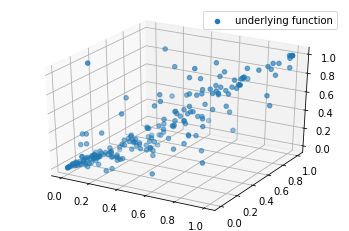

In [168]:
plot_3d(train_x, y_true)

# **part b**


### 1) Pytorch tensor datastructure : 3 layer NN with relu activation **function**

In [81]:
import numpy as np
from typing import Callable
from matplotlib.pyplot import *
from mpl_toolkits import mplot3d

#this is the input data choosen with random uniform numbers and weights and bias initialized 
n = 500
d = 3
x = np.random.uniform(-1, 1, (n, d))
wts_tr_1 = np.array([[3, 1, 2],]).T
bs_tr_1 = np.array([1])
y_true_1 = (x ** 3) @ wts_tr_1 + x @ wts_tr_1 + bs_tr_1

weights_true_2 = np.array([[2, 1, 4],]).T
bias_true_2 = np.array([2])
y_true_2 = (x ** 3) @ weights_true_2 + x @ weights_true_2 + bias_true_2

weights_true = np.array(wts_tr_1+weights_true_2)
bias_true = np.array(bs_tr_1+bias_true_2)
y_true = np.hstack((y_true_1, y_true_2))

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')


x: (500, 3), weights: (3, 1), bias: (1,), y: (500, 2)


In [83]:
import torch
import torch.nn as nn
import torch.nn.functional as F

X_tf = torch.tensor((x), dtype=torch.float) # 3 X 2 tensor
y_tf = torch.tensor((y_true), dtype=torch.float) # 3 X 1 tensor
xPredicted = torch.tensor(([1,1,1]), dtype=torch.float) # 1 X 2 tensor

print(X_tf.size())
print(y_tf.size())

torch.Size([500, 3])
torch.Size([500, 2])


In [84]:
class Neural_Network(nn.Module):
    def __init__(self, ):
        super(Neural_Network, self).__init__()
        # parameters
        # TODO: parameters can be parameterized instead of declaring them here
        self.inputSize = 3
        self.outputSize = 2
        self.hiddenSize = 5
        
        # weights
        self.W1 = torch.randn(self.inputSize, self.hiddenSize) # 2 X 3 tensor
        self.W2 = torch.randn(self.hiddenSize, self.outputSize) # 3 X 1 tensor
        
    def forward(self, X):
        self.z = torch.matmul(X, self.W1) # 3 X 3 ".dot" does not broadcast in PyTorch
        self.z2 = self.relu(self.z) # activation function
        self.z3 = torch.matmul(self.z2, self.W2)
        o = self.sigmoid(self.z3) # final activation function
        return o
        
    def sigmoid(self, s):
        return 1 / (1 + torch.exp(-s))

    def relu(self,s):
         return np.maximum(0,s)

    def sigmoidPrime(self, s):
        # derivative of sigmoid
        return s * (1 - s)

    def reluPrime(self, s):
        # derivative of sigmoid
   
        s[s<=0] = 0
        s[s>0] = 1
        return s
        
    def eta(self, x):
      ETA = 0.0000000001
      return np.maximum(x, ETA)

    
    def backward(self, X, y, o ,lr =0.5):
        self.o_error = y - o # error in output
        self.o_delta = self.o_error * self.reluPrime(o) # derivative of sig to error
        self.z2_error = torch.matmul(self.o_delta, torch.t(self.W2))
        self.z2_delta = self.z2_error * self.reluPrime(self.z2)

        self.W1 += lr * torch.matmul(torch.t(X), self.z2_delta)
        self.W2 += lr * torch.matmul(torch.t(self.z2), self.o_delta)
        
    def train(self, X, y ,lr=0.5):
        # forward + backward pass for training
        o = self.forward(X)
        self.backward(X, y, o ,lr =0.5)
 #   def update(self,lr):
 #       self.W1 = self.W1 - lr * self.weights_gradient 
 #       self.bias = self.bias - lr * self.bias_gradient
        
    def saveWeights(self, model):
       
        torch.save(model, "NN")
      
        
    def predict(self):
        print ("Predicted data based on trained weights: ")
        print ("Input (scaled): \n" + str(xPredicted))
        print ("Output: \n" + str(self.forward(xPredicted)))

In [85]:
def relu(self,s):
         return np.maximum(0,s)
         
def reluPrime(self, s):   
        s[s<=0] = 0
        s[s>0] = 1
        return s

In [79]:
NN = Neural_Network()
ll=[]
for i in range(100):  # trains the NN 100 times
    los = str(torch.mean((y_tf - NN(X_tf))**2).detach().item())
    print ("#" + str(i) + " Loss: " +los )  # mean sum squared loss
    ll.append(los)
    NN.train(X_tf, y_tf ,lr=0.7)
NN.saveWeights(NN)
NN.predict()

#0 Loss: 17.529939651489258
#1 Loss: 16.712486267089844
#2 Loss: 16.07284927368164
#3 Loss: 14.560943603515625
#4 Loss: 14.55620288848877
#5 Loss: 14.50146484375
#6 Loss: 14.533760070800781
#7 Loss: 14.519283294677734
#8 Loss: 14.471502304077148
#9 Loss: 14.458681106567383
#10 Loss: 14.469277381896973
#11 Loss: 14.487473487854004
#12 Loss: 14.498945236206055
#13 Loss: 15.417802810668945
#14 Loss: 14.54658317565918
#15 Loss: 15.394246101379395
#16 Loss: 14.563236236572266
#17 Loss: 15.380398750305176
#18 Loss: 14.538093566894531
#19 Loss: 15.381854057312012
#20 Loss: 14.518194198608398
#21 Loss: 14.505047798156738
#22 Loss: 15.385257720947266
#23 Loss: 14.528989791870117
#24 Loss: 15.385257720947266
#25 Loss: 14.51577377319336
#26 Loss: 14.504178047180176
#27 Loss: 15.388786315917969
#28 Loss: 14.508281707763672
#29 Loss: 14.49392032623291
#30 Loss: 15.388786315917969
#31 Loss: 14.508281707763672
#32 Loss: 14.50183391571045
#33 Loss: 15.385294914245605
#34 Loss: 14.51108169555664
#35 Lo

### 2) Pytorch tensor datastructure : 3 layer neural NN - with relu activation function - auto differentiation primitives

In [87]:
class MyTorchModel(nn.Module):
  def __init__(self, input_dim, num_hiddenlayer1, num_hiddenlayer2):
    super(MyTorchModel, self).__init__()
    self.linear1 = nn.Linear(input_dim , num_hiddenlayer1)
    self.relu1 = nn.ReLU()
    self.linear2 = nn.Linear(num_hiddenlayer1 , num_hiddenlayer2)
    self.relu2 = nn.ReLU()
    self.linear3 = nn.Linear(num_hiddenlayer2,2)

  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu1(l1)
    l2 = self.linear2(r)
    r = self.relu2(l2)
    l3 = self.linear3(r)
    return l3


In [88]:
loss = nn.MSELoss()
model = MyTorchModel(d, 10, 50)
x_tnsr = torch.tensor(x).float()
y_tru_tnsr = torch.tensor(y_true).float()
y_pred_tnsr = model(x_tnsr)
loss_value = loss(y_pred_tnsr, y_tru_tnsr)
print(loss_value)

tensor(18.8469, grad_fn=<MseLossBackward>)


In [89]:
# Test just one forward and backward step
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tnsr = model(x_tnsr)
loss_value = loss(y_pred_tnsr, y_tru_tnsr)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tnsr = model(x_tnsr)
loss_value = loss(y_pred_tnsr, y_tru_tnsr)
print(loss_value)

tensor(18.8469, grad_fn=<MseLossBackward>)
tensor(17.8045, grad_fn=<MseLossBackward>)


In [92]:
# Now we run the training loop

def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tnsr = model(x_tnsr)
    loss_value = loss(y_pred_tnsr, y_tru_tnsr)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tnsr, y_tru_tnsr, model=model, loss=loss, lr=0.1, num_epochs=70)

tensor(1.0025, grad_fn=<MseLossBackward>)
tensor(0.9804, grad_fn=<MseLossBackward>)
tensor(0.9578, grad_fn=<MseLossBackward>)
tensor(0.9352, grad_fn=<MseLossBackward>)
tensor(0.9126, grad_fn=<MseLossBackward>)
tensor(0.8897, grad_fn=<MseLossBackward>)
tensor(0.8665, grad_fn=<MseLossBackward>)
tensor(0.8433, grad_fn=<MseLossBackward>)
tensor(0.8201, grad_fn=<MseLossBackward>)
tensor(0.7966, grad_fn=<MseLossBackward>)
tensor(0.7730, grad_fn=<MseLossBackward>)
tensor(0.7497, grad_fn=<MseLossBackward>)
tensor(0.7269, grad_fn=<MseLossBackward>)
tensor(0.7050, grad_fn=<MseLossBackward>)
tensor(0.6854, grad_fn=<MseLossBackward>)
tensor(0.6695, grad_fn=<MseLossBackward>)
tensor(0.6585, grad_fn=<MseLossBackward>)
tensor(0.6581, grad_fn=<MseLossBackward>)
tensor(0.6743, grad_fn=<MseLossBackward>)
tensor(0.7360, grad_fn=<MseLossBackward>)
tensor(0.8492, grad_fn=<MseLossBackward>)
tensor(1.1683, grad_fn=<MseLossBackward>)
tensor(1.5447, grad_fn=<MseLossBackward>)
tensor(2.5595, grad_fn=<MseLossBac

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':


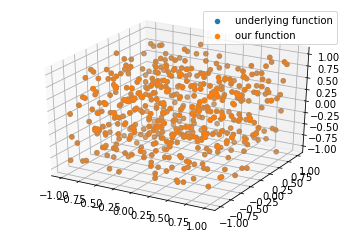

In [93]:
plot_3d(x, y_true, model(x_tnsr).detach())

### 3) Pytorch linear modules datastructure : 3 layer NN with relu nonlinearity - high level primitives

In [94]:
#### using high level premitives doing the pytorch implementation
#Installing pytorch lighting
%%capture
! pip install git+https://github.com/PytorchLightning/pytorch-lightning.git@master --upgrade 

In [96]:
import os

import torch
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms

import pytorch_lightning as pl


class CoolSystem(pl.LightningModule):
  

    def __init__(self,classes=2):
        super(CoolSystem,self).__init__()
       # self.save_hyperparameters()
        self.save_hyperparameters()
        # not the best model...
        self.layer1 = torch.nn.Linear(3, 14)
        self.layer2 = torch.nn.Linear(14, 28)
        self.layer3 = torch.nn.Linear(28, 28)
        self.layer4 = torch.nn.Linear(28, 2)
        
           # Log hyperparameters
        

    def forward(self, x):
        # x = x.view(x.size(0),-1)

         x = self.layer1(x)
         x = torch.relu(x)

         x = self.layer2(x)
         x = torch.relu(x)

         x = self.layer3(x)
         x = torch.relu(x)


         x = self.layer4(x)

         return x

#torch.relu(self.l1(x.view(x.size(0), -1)))
    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        #loss = F.cross_entropy(y_hat, y)
        loss= F.mse_loss(y_hat, y)   
        tensorboard_logs = {'train_loss': loss}
        return {'loss': loss, 'log': tensorboard_logs}

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
      #  loss = F.cross_entropy(y_hat, y)
        loss= F.mse_loss(y_hat, y)  
        return {'val_loss': loss}

    def validation_epoch_end(self, outputs):
        avg_loss = torch.stack([x['val_loss'] for x in outputs]).mean()
        return {'val_loss': avg_loss}

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)

In [97]:
from pytorch_lightning import Trainer, seed_everything
seed_everything(0)

Global seed set to 0


0

In [98]:
import tensorflow as tf


x_tnsr

dataset  = tf.concat([x_tnsr, y_tru_tnsr], 1)
dataset[:20]

<tf.Tensor: shape=(20, 5), dtype=float32, numpy=
array([[ 6.12019479e-01, -3.59207578e-02,  4.45986420e-01,
         4.55720949e+00,  5.78533697e+00],
       [ 7.32828438e-01,  3.30798268e-01, -6.00112677e-01,
         3.11368227e+00,  1.35482872e+00],
       [-7.29089797e-01, -7.60559499e-01, -1.79203913e-01,
        -3.92038393e+00, -2.17364812e+00],
       [ 5.97884715e-01, -9.32769775e-01, -8.31571221e-01,
        -1.12273347e+00, -3.74756479e+00],
       [-8.16037536e-01, -2.90573418e-01,  6.21738613e-01,
        -1.66930592e+00,  2.41429973e+00],
       [-1.21873267e-01,  5.20168841e-01, -6.21654510e-01,
        -4.33927804e-01, -1.03403556e+00],
       [ 8.55597436e-01,  5.45287915e-02, -9.98703182e-01,
         1.51086009e+00, -2.96071053e+00],
       [ 8.21553707e-01,  6.52165473e-01,  8.86246800e-01,
         9.22239876e+00,  1.20110064e+01],
       [ 4.56880987e-01, -4.24585193e-01,  8.16052377e-01,
         4.87461615e+00,  8.04135609e+00],
       [-4.39611882e-01, -6.72106

In [100]:


from sklearn.model_selection import train_test_split
y = np.hstack((y_true_1, y_true_2))
y.shape
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1)

# From numpy to torch tensors
x_train = torch.from_numpy(x_train).type(torch.FloatTensor)
y_train = torch.from_numpy(y_train).type(torch.FloatTensor)

# From numpy to torch tensors
x_val = torch.from_numpy(x_val).type(torch.FloatTensor)
y_val = torch.from_numpy(y_val).type(torch.FloatTensor)

# Implements Dataset and DataLoader
train_dtst = torch.utils.data.TensorDataset(x_train, y_train)
train_dataldr = torch.utils.data.DataLoader(train_dtst, batch_size=5)


# Implements Dataset and DataLoader
val_dtst = torch.utils.data.TensorDataset(x_val, y_val)
val_dataldr = torch.utils.data.DataLoader(val_dtst, batch_size=5)

In [102]:

# model
from pytorch_lightning import Trainer

model = CoolSystem()

# most basic trainer, uses good defaults]
#num_tpu_cores=8,
trainer = Trainer( progress_bar_refresh_rate=20, max_epochs=14)
trainer.fit(model,train_dataldr,val_dataldr)
# Testing the model
trainer.test()


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name   | Type   | Params
----------------------------------
0 | layer1 | Linear | 56    
1 | layer2 | Linear | 420   
2 | layer3 | Linear | 812   
3 | layer4 | Linear | 58    
----------------------------------
1.3 K     Trainable params
0         Non-trainable params
1.3 K     Total params
0.005     Total estimated model params size (MB)


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:52: UserWarning: The validation_epoch_end should not return anything as of 9.1. To log, use self.log(...) or self.write(...) directly in the LightningModule
  warnings.warn(*args, **kwargs)


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:52: UserWarning: The {log:dict keyword} was deprecated in 0.9.1 and will be removed in 1.0.0
Please use self.log(...) inside the lightningModule instead.
# log on a step or aggregate epoch metric to the logger and/or progress bar (inside LightningModule)
self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True)
  warnings.warn(*args, **kwargs)


1

# **part c**


### 1) Implementation of Keras Tensorflow from scratch - 3 layer NN

In [125]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [126]:
from tensorflow.keras import layers
import tensorflow as tf
import tensorflow 

from tensorflow import keras
from keras.layers import Dense

class Linear(keras.layers.Layer):

  def __init__(self, units=32):
      super(Linear, self).__init__()
      self.units = units

  def build(self, input_shape):
      self.w = self.add_weight(shape=(input_shape[-1], self.units),
                               initializer='random_normal',
                               trainable=True)
      self.b = self.add_weight(shape=(self.units,),
                               initializer='random_normal',
                               trainable=True)

  def call(self, inputs):
      return tf.matmul(inputs, self.w) + self.b


# Instantiate our lazy layer.
linear_layer = Linear(3)

# This will also call `build(input_shape)` and create the weights.
y = linear_layer(tf.ones((2, 2)))
assert len(linear_layer.weights) == 2

In [127]:

#x = tf.Variable(np.array([0.060, 0.060, 0.06, 0.040, 0.060]), trainable=True, dtype=tf.float64)
x_train = tf.Variable(x, trainable=True, dtype=tf.float32)

y = np.hstack((y_true_1, y_true_2))
y.shape
y_train = tf.Variable(y, trainable=True, dtype=tf.float32)


#preparing datasets

dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))
dataset

<TensorSliceDataset shapes: ((3,), (2,)), types: (tf.float32, tf.float32)>

In [128]:
def custom_loss_function(y_true, y_pred):
   squared_difference = tf.square(y_true - y_pred)
   return tf.reduce_mean(squared_difference, axis=-1)

In [129]:

# Instantiate a simple classification model
model = tf.keras.Sequential([
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(10)
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

In [130]:

class MLP(keras.layers.Layer):

  def __init__(self):
    super(MLP ,self).__init__()
    self.linear_1 = Linear(3)
    self.linear_2 = Linear(10)
    self.linear_3 = Linear(2)
    

  def call(self,inputs):
    l1=self.linear_1(inputs)
    r=tf.nn.relu(l1)

    l2=self.linear_2(r)
    r=tf.nn.relu(l2) 
    
    l3=self.linear_3(r)

    return l3


In [131]:
mlp = MLP()
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
optimizer = tf.keras.optimizers.Adam()

In [132]:
#for step, (x,y) in enumerate(dataset):
with tf.GradientTape() as tape:
  #open a gradient tape 

  #forward pass
    logits = mlp(x_train)
  #loss value for this batch
    loss_value = custom_loss_function(y_train , logits)
    print(loss_value)

#get the gradient of loss wrt the weights

gradient = tape.gradient(loss_value , mlp.trainable_weights)


#Update the weights of linear layer
optimizer.apply_gradients(zip(gradient , mlp.trainable_weights))


#loss_value

tf.Tensor(
[2.71843319e+01 5.88635445e+00 9.91208744e+00 7.70652390e+00
 4.15436125e+00 6.38686359e-01 5.69020653e+00 1.14780121e+02
 4.42284317e+01 9.11595225e-01 1.76091118e+01 1.85615768e+01
 2.29358959e+00 3.44980011e+01 4.85536385e+00 4.72071028e+00
 3.86132859e-02 4.95083237e+00 2.35105095e+01 7.63704598e-01
 5.53874195e-01 5.07213936e+01 3.89282751e+00 1.27997255e+01
 2.43009567e+01 2.85304403e+00 7.35237551e+00 8.23772073e-01
 1.79440987e+00 7.25888729e+00 6.37961864e-01 2.70874825e+01
 5.10498009e+01 9.58789444e+00 1.76235180e+01 4.73864365e+01
 5.05481184e-01 3.89318094e-02 8.95943880e-01 3.34138794e+01
 5.50859261e+00 4.13441658e+00 2.07899880e+00 3.58938313e+00
 2.13589249e+01 2.69825125e+00 2.40693569e+01 2.28259773e+01
 1.57845428e+02 4.36551857e+01 2.27482529e+01 7.53056240e+00
 6.66730804e+01 2.68648005e+00 2.18758178e+00 1.10651255e+01
 6.27412260e-01 7.00467300e+00 8.89367390e+00 3.34983406e+01
 1.75236535e+00 2.90007343e+01 2.34542871e+00 1.72529444e-01
 7.85221767e+

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

### 2) Tensorflow tensor data structure to build relu activation function - auto differentiation primitives

In [133]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inputs = keras.Input(shape=(3,))
layer1 = layers.Dense(20, activation='relu', name='dense_1')(inputs)
layer2 = layers.Dense(28, activation='relu', name='dense_2')(layer1)
outputs = layers.Dense(2, name='regression')(layer2)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 28)                588       
_________________________________________________________________
regression (Dense)           (None, 2)                 58        
Total params: 726
Trainable params: 726
Non-trainable params: 0
_________________________________________________________________
None


In [134]:
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))
model.fit(x, y_true, epochs=100)
y_pred = model.predict(x)

Epoch 1/100
16/16 [==============================] - 0s 1ms/step - loss: 13.2087
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 1.7923
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9745
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8400
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5520
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 0.9350
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7763
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 3.8096
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4527
Epoch 10/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2983
Epoch 11/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5765
Epoch 12/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4633
Epoch 13/100
16/16 [================

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':


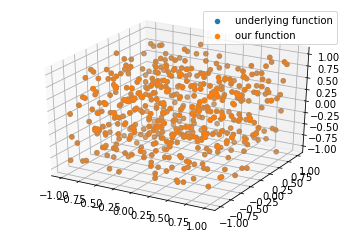

In [135]:
plot_3d(x, y_true, y_pred)

### 3) Tensorflow keras linear modules etc.,. - high level primitives and build neural network - Model subclassing


In [136]:
# Prepare a dataset.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset = dataset.shuffle(buffer_size=1024).batch(64)

# Instantiate a simple classification model
model = tf.keras.Sequential([
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(10)
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

In [137]:
model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

In [138]:
model.fit(dataset, epochs=5)

Epoch 1/5
938/938 [==============================] - 6s 6ms/step - loss: 0.3791 - sparse_categorical_accuracy: 0.8937
Epoch 2/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0965 - sparse_categorical_accuracy: 0.9706
Epoch 3/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0609 - sparse_categorical_accuracy: 0.9811
Epoch 4/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0439 - sparse_categorical_accuracy: 0.9860
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0338 - sparse_categorical_accuracy: 0.9890


In [139]:
x_test = x_test[:].reshape(10000, 784).astype('float32') / 255
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(128)

loss, acc = model.evaluate(test_dataset)
print('loss: %.3f - acc: %.3f' % (loss, acc))

79/79 [==============================] - 0s 4ms/step - loss: 0.0918 - sparse_categorical_accuracy: 0.9751
loss: 0.092 - acc: 0.975


In [140]:
# Instantiate a simple classification model
model = tf.keras.Sequential([
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(10)
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=[accuracy])

# Instantiate some callbacks
callbacks = [tf.keras.callbacks.EarlyStopping(),
             tf.keras.callbacks.ModelCheckpoint(filepath='my_model.keras',
                                                save_best_only=True)]

model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          epochs=30,
          batch_size=64,
          callbacks=callbacks)

Epoch 1/30
938/938 [==============================] - 6s 6ms/step - loss: 0.4014 - sparse_categorical_accuracy: 0.8829 - val_loss: 0.1057 - val_sparse_categorical_accuracy: 0.9665
Epoch 2/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0863 - sparse_categorical_accuracy: 0.9732 - val_loss: 0.0991 - val_sparse_categorical_accuracy: 0.9685
Epoch 3/30
938/938 [==============================] - 6s 6ms/step - loss: 0.0575 - sparse_categorical_accuracy: 0.9823 - val_loss: 0.0853 - val_sparse_categorical_accuracy: 0.9733
Epoch 4/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0381 - sparse_categorical_accuracy: 0.9874 - val_loss: 0.0849 - val_sparse_categorical_accuracy: 0.9759
Epoch 5/30
938/938 [==============================] - 6s 6ms/step - loss: 0.0272 - sparse_categorical_accuracy: 0.9909 - val_loss: 0.0854 - val_sparse_categorical_accuracy: 0.9772


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':


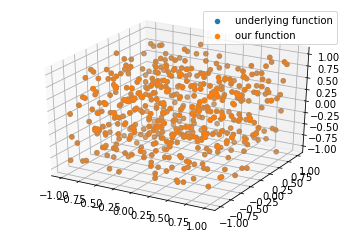

In [141]:
plot_3d(x, y_true, y_pred)

### References followed :
Class PPT 


